<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/KNN_vs_SVM-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")


In [9]:
# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]

In [10]:
# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'column_name' is the column containing string values
le = LabelEncoder()
X['GENDER'] = le.fit_transform(X['GENDER'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
!pip install pandas

In [12]:
import pandas as pd

In [13]:
X = pd.DataFrame(X)

In [14]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
# KNN Model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)


In [18]:
# SVM Model
svm_clf = SVC(kernel='rbf')  # Experiment with different kernels and parameters
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your labels are 'NO' and 'YES'
pos_label = 'YES'

print("KNN:")
print(f"Precision: {precision_score(y_test, y_pred_knn, pos_label=pos_label)}")
print(f"Recall: {recall_score(y_test, y_pred_knn, pos_label=pos_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, pos_label=pos_label)}")



KNN:
Precision: 0.9651162790697675
Recall: 0.9651162790697675
F1-score: 0.9651162790697675


In [19]:

score_knn = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 93.55 %


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'NO' is the positive label
pos_label = 'YES'

print("\nSVM:")
print(f"Precision: {precision_score(y_test, y_pred_svm, pos_label=pos_label)}")
print(f"Recall: {recall_score(y_test, y_pred_svm, pos_label=pos_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_svm, pos_label=pos_label)}")




SVM:
Precision: 0.9659090909090909
Recall: 0.9883720930232558
F1-score: 0.9770114942528736


In [21]:

score_svm = round(accuracy_score(y_test, y_pred_svm)*100,2)
print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")

The accuracy score achieved using SVM is: 95.7 %


In [22]:
scores = [score_svm,score_knn]
algorithms = ["Support Vector Machine","K-Nearest Neighbors"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 95.7 %
The accuracy score achieved using K-Nearest Neighbors is: 93.55 %


In [24]:
!pip install seaborn

In [25]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

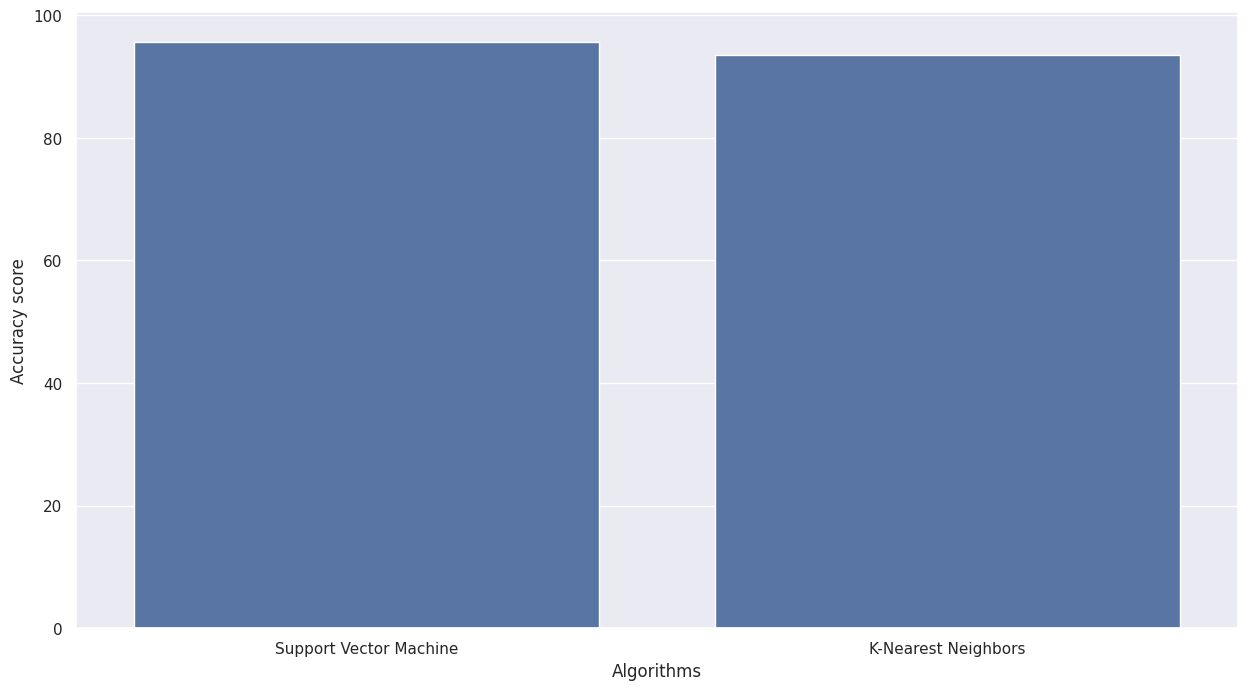

In [28]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)